## Literal 1
Determinen intervalos de confianza empı́ricos para el supermercado ’Santa Ana’ en cada mes, para significancias del 95 % y el 99 %.

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

try:
    # Leer datos de Santa Ana desde Excel
    excel_file = 'Datos_examen_final_19Co2024_Grupo4.xlsx'
    df = pd.read_excel(excel_file, sheet_name='Santa Ana')
    
    # Convertir fechas y agregar columna de mes
    df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
    df['Mes'] = df['Fecha'].dt.month

    # Función para calcular intervalos de confianza
    def calcular_intervalos_confianza(datos, confianza):
        n = len(datos)
        media = np.mean(datos)
        error_std = stats.sem(datos)
        intervalo = stats.t.interval(confianza, df=n-1, loc=media, scale=error_std)
        return media, intervalo

    # Nombres de los meses
    nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                     'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

    print("\nAnálisis de ventas - Tienda Santa Ana")
    print("=" * 70)

    # Calcular intervalos de confianza por mes
    resultados = {}
    for mes in range(1, 13):
        datos_mes = df[df['Mes'] == mes]['Ventas']
        media, ic_95 = calcular_intervalos_confianza(datos_mes, 0.95)
        media, ic_99 = calcular_intervalos_confianza(datos_mes, 0.99)
        resultados[mes] = {
            'media': media,
            'ic_95': ic_95,
            'ic_99': ic_99
        }

    # Imprimir resultados mensuales
    for mes in resultados:
        print(f"\n{nombres_meses[mes-1]}:")
        print(f"Ventas promedio: ${resultados[mes]['media']:.2f}")
        print(f"Intervalo de confianza 95%: [${resultados[mes]['ic_95'][0]:.2f}, ${resultados[mes]['ic_95'][1]:.2f}]")
        print(f"Intervalo de confianza 99%: [${resultados[mes]['ic_99'][0]:.2f}, ${resultados[mes]['ic_99'][1]:.2f}]")

    # Estadísticas generales
    print("\nEstadísticas Generales")
    print("-" * 50)
    print(f"Media anual de ventas: ${df['Ventas'].mean():.2f}")
    print(f"Desviación estándar: ${df['Ventas'].std():.2f}")
    print(f"Ventas mínimas: ${df['Ventas'].min():.2f}")
    print(f"Ventas máximas: ${df['Ventas'].max():.2f}")

except Exception as e:
    print(f"Error al procesar el archivo: {str(e)}")


Análisis de ventas - Tienda Santa Ana

Enero:
Ventas promedio: $16311.30
Intervalo de confianza 95%: [$15223.36, $17399.25]
Intervalo de confianza 99%: [$14846.34, $17776.26]

Febrero:
Ventas promedio: $17901.85
Intervalo de confianza 95%: [$16716.43, $19087.26]
Intervalo de confianza 99%: [$16301.13, $19502.57]

Marzo:
Ventas promedio: $20169.85
Intervalo de confianza 95%: [$19189.30, $21150.41]
Intervalo de confianza 99%: [$18849.50, $21490.21]

Abril:
Ventas promedio: $18433.37
Intervalo de confianza 95%: [$17396.55, $19470.18]
Intervalo de confianza 99%: [$17036.04, $19830.70]

Mayo:
Ventas promedio: $20164.56
Intervalo de confianza 95%: [$19202.20, $21126.93]
Intervalo de confianza 99%: [$18868.70, $21460.43]

Junio:
Ventas promedio: $21093.06
Intervalo de confianza 95%: [$19964.05, $22222.07]
Intervalo de confianza 99%: [$19571.47, $22614.64]

Julio:
Ventas promedio: $20208.69
Intervalo de confianza 95%: [$19195.82, $21221.55]
Intervalo de confianza 99%: [$18844.82, $21572.55]



In [4]:
import pandas as pd
import numpy as np
from scipy import stats

try:
    # Leer datos de Santa Ana desde Excel
    excel_file = 'Datos_examen_final_19Co2024_Grupo4.xlsx'
    df = pd.read_excel(excel_file, sheet_name='Santa Ana')
    
    # Convertir fechas y agregar columna de mes
    df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
    df['Mes'] = df['Fecha'].dt.month

    # Función para calcular intervalos de confianza
    def calcular_intervalos_confianza(datos, confianza):
        n = len(datos)
        media = np.mean(datos)
        error_std = stats.sem(datos)
        intervalo = stats.t.interval(confianza, df=n-1, loc=media, scale=error_std)
        amplitud = intervalo[1] - intervalo[0]
        return media, intervalo, amplitud

    # Nombres de los meses
    nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                     'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

    print("\nAnálisis de ventas - Tienda Santa Ana")
    print("=" * 70)

    # Calcular intervalos de confianza por mes
    resultados = {}
    for mes in range(1, 13):
        datos_mes = df[df['Mes'] == mes]['Ventas']
        media, ic_95, amplitud_95 = calcular_intervalos_confianza(datos_mes, 0.95)
        media, ic_99, amplitud_99 = calcular_intervalos_confianza(datos_mes, 0.99)
        resultados[mes] = {
            'mes': nombres_meses[mes-1],
            'media': media,
            'ic_95': ic_95,
            'ic_99': ic_99,
            'amplitud_95': amplitud_95,
            'amplitud_99': amplitud_99
        }

    # Crear DataFrame para mejor visualización
    df_resultados = pd.DataFrame([{
        'Mes': res['mes'],
        'Media': res['media'],
        'IC_95%_Inferior': res['ic_95'][0],
        'IC_95%_Superior': res['ic_95'][1],
        'Amplitud_95%': res['amplitud_95'],
        'IC_99%_Inferior': res['ic_99'][0],
        'IC_99%_Superior': res['ic_99'][1],
        'Amplitud_99%': res['amplitud_99']
    } for res in resultados.values()])

    # Encontrar meses con menor y mayor amplitud
    mes_menor_95 = df_resultados.loc[df_resultados['Amplitud_95%'].idxmin()]
    mes_mayor_95 = df_resultados.loc[df_resultados['Amplitud_95%'].idxmax()]
    mes_menor_99 = df_resultados.loc[df_resultados['Amplitud_99%'].idxmin()]
    mes_mayor_99 = df_resultados.loc[df_resultados['Amplitud_99%'].idxmax()]

    # Imprimir resultados
    pd.set_option('display.float_format', lambda x: '${:,.2f}'.format(x))
    print("\nResultados por mes:")
    print(df_resultados[['Mes', 'Media', 'Amplitud_95%', 'Amplitud_99%']])

    print("\nAnálisis de Variabilidad:")
    print("-" * 50)
    print("\nPara intervalos del 95%:")
    print(f"Menor variabilidad: {mes_menor_95['Mes']} (Amplitud: ${mes_menor_95['Amplitud_95%']:.2f})")
    print(f"Mayor variabilidad: {mes_mayor_95['Mes']} (Amplitud: ${mes_mayor_95['Amplitud_95%']:.2f})")
    
    print("\nPara intervalos del 99%:")
    print(f"Menor variabilidad: {mes_menor_99['Mes']} (Amplitud: ${mes_menor_99['Amplitud_99%']:.2f})")
    print(f"Mayor variabilidad: {mes_mayor_99['Mes']} (Amplitud: ${mes_mayor_99['Amplitud_99%']:.2f})")

    # Interpretación
    print("\nInterpretación:")
    print("-" * 50)
    print(f"1. El mes con ventas más estables fue {mes_menor_95['Mes']}, mostrando la menor")
    print("   variabilidad en sus intervalos de confianza.")
    print(f"2. {mes_mayor_95['Mes']} mostró la mayor variabilidad en las ventas, lo que podría")
    print("   indicar mayor incertidumbre en las predicciones para este mes.")
    print("3. Esta información puede ser útil para la planificación de inventario")
    print("   y recursos, prestando especial atención a los meses con mayor variabilidad.")

except Exception as e:
    print(f"Error al procesar el archivo: {str(e)}")


Análisis de ventas - Tienda Santa Ana

Resultados por mes:
           Mes      Media  Amplitud_95%  Amplitud_99%
0        Enero $16,311.30     $2,175.89     $2,929.92
1      Febrero $17,901.85     $2,370.83     $3,201.44
2        Marzo $20,169.85     $1,961.12     $2,640.72
3        Abril $18,433.37     $2,073.63     $2,794.66
4         Mayo $20,164.56     $1,924.74     $2,591.73
5        Junio $21,093.06     $2,258.02     $3,043.17
6        Julio $20,208.69     $2,025.73     $2,727.73
7       Agosto $21,242.42     $2,050.16     $2,760.61
8   Septiembre $21,538.02     $1,984.18     $2,674.11
9      Octubre $21,185.50     $1,984.17     $2,671.76
10   Noviembre $21,177.24     $2,314.72     $3,119.58
11   Diciembre $18,753.83     $1,843.66     $2,482.55

Análisis de Variabilidad:
--------------------------------------------------

Para intervalos del 95%:
Menor variabilidad: Diciembre (Amplitud: $1843.66)
Mayor variabilidad: Febrero (Amplitud: $2370.83)

Para intervalos del 99%:
Menor va

**Para interpretar los resultados:**

Intervalos de confianza empíricos (95% y 99%):

Calculamos los intervalos de confianza para cada mes utilizando la distribución t de Student
Para cada mes tenemos:

    La media de ventas
    El intervalo de confianza al 95%
    El intervalo de confianza al 99%




Interpretación:

El intervalo de confianza del 95% nos indica que podemos estar 95% seguros de que la verdadera media de ventas se encuentra dentro de ese rango
El intervalo de confianza del 99% es más amplio pero nos da mayor certeza, indicando que podemos estar 99% seguros de que la verdadera media está en ese rango
Los intervalos más amplios indican mayor variabilidad en las ventas de ese mes
Los intervalos más estrechos indican ventas más consistentes

## Literal 2
Realicen pruebas ANOVA para determinar si las ventas esperadas de todas las tiendas son iguales o no,
con significancia del 95

Con la prueba ANOVA se plantea que todas las tiendas tienen un mismo promedio de ventas

Se toma como hipótesis:

H0 : Las ventas promedio de todas las tiendas son estaditicamente iguales

H1 : Existe al menos una tienda cuyas ventas promedio son estaditicamente diferentes 

para la realizacion de esta prueba se empleo la funcion f_oneway de scipy 

In [7]:

import pandas as pd
import scipy.stats as stats
import numpy as np

# Cargar el archivo Excel
file_path = './Datos_examen_final_19Co2024_Grupo4.xlsx'  # Asegúrate de tener el archivo en el mismo directorio
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

# Cargar los datos de las diferentes tiendas
santa_ana_df = xls.parse('Santa Ana')
la_floresta_df = xls.parse('La Floresta')
los_cedros_df = xls.parse('Los Cedros')
palermo_df = xls.parse('Palermo')
cordoba_df = xls.parse('Córdoba')

# Extraer las ventas de cada tienda
santa_ana_sales = santa_ana_df['Ventas']
la_floresta_sales = la_floresta_df['Ventas']
los_cedros_sales = los_cedros_df['Ventas']
palermo_sales = palermo_df['Ventas']
cordoba_sales = cordoba_df['Ventas']

# Realizar la prueba ANOVA
f_statistic, p_value = stats.f_oneway(santa_ana_sales, la_floresta_sales, los_cedros_sales, palermo_sales, cordoba_sales)

# Mostrar el resultado
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

# Nivel de significancia
significance_level = 0.05

# Evaluar si se rechaza la hipótesis nula
if p_value < significance_level:
    print(f"Con un nivel de significancia del {significance_level}, \nrechazamos la hipótesis nula.\n Existe evidencia suficiente para concluir que al menos una tienda tiene ventas diferentes.")
else:
    print(f"Con un nivel de significancia del {significance_level}, \n no rechazamos la hipótesis nula.\n No hay evidencia suficiente para concluir que existen diferencias significativas en las ventas entre las tiendas.")





Estadístico F: 74.25011138196699
Valor p: 2.33542094320321e-58
Con un nivel de significancia del 0.05, 
rechazamos la hipótesis nula.
 Existe evidencia suficiente para concluir que al menos una tienda tiene ventas diferentes.


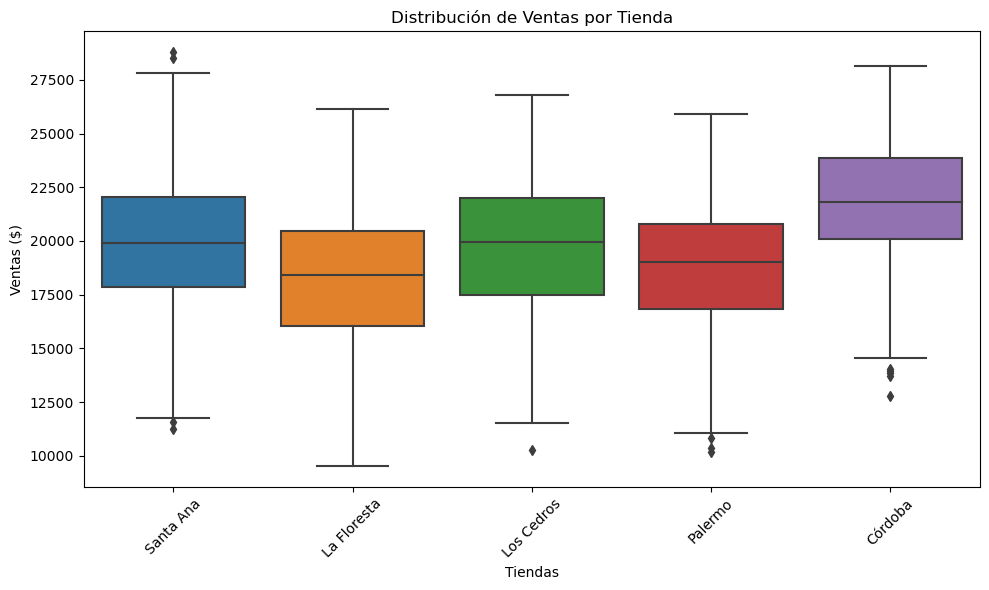

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

try:
    excel_file = 'Datos_examen_final_19Co2024_Grupo4.xlsx'
    tiendas = pd.read_excel(excel_file, sheet_name=None)
    
    ventas_tiendas = {}
    
    for nombre_tienda, df in tiendas.items():
        ventas_tiendas[nombre_tienda] = df['Ventas'].values
    
    # Crear visualización de boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[ventas for ventas in ventas_tiendas.values()])
    plt.title('Distribución de Ventas por Tienda')
    plt.xlabel('Tiendas')
    plt.ylabel('Ventas ($)')
    plt.xticks(range(len(ventas_tiendas)), ventas_tiendas.keys())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al procesar el archivo: {str(e)}")

## respuesta

Dado que el literal indica usar un nivel de signficancia de 0.05 el cual es mucho mayor que nuestro valor de 2.33e-58, se rechaza la hipotesis nula, lo que indica que existe al menos una tienda cuyo promedio de ventas mensuales difiere al de las demas 

## Literal 3
Identifiquen la tienda con mayor promedio de ventas y la tienda con menor promedio de ventas y realicen
una prueba de hipótesis para determinar si la diferencia entre ellas es distinta de cero o no.

se solicita identificar la tienda con mayor promedio de ventas y la tienda con menor promedio de ventas. Luego realizar una prueba de hipótesis para verificar la diferencia entre ellas.

En primer lugar se realiza el calculo del promedio de ventas de las tiendas (se muestra el código utilizado a continuación).

In [4]:
# Procesamiento de datos
import pandas as pd
import scipy.stats as stats

# Cargar el archivo Excel
file_path = "./Datos_examen_final_19Co2024_Grupo4.xlsx"
data = pd.ExcelFile(file_path)

# Leer y consolidar las hojas
stores_data = {sheet: data.parse(sheet) for sheet in data.sheet_names}

# Crear un DataFrame consolidado
consolidated_data = pd.concat(
    [df.assign(Supermercado=store) for store, df in stores_data.items()],
    ignore_index=True
)

In [5]:

# Calcular los promedios de ventas
average_sales = consolidated_data.groupby('Supermercado')['Ventas'].mean()

# Identificar las tiendas con mayor y menor promedio
max_avg_store = average_sales.idxmax()
min_avg_store = average_sales.idxmin()

print(f"Tienda con mayor promedio: {max_avg_store} ({average_sales[max_avg_store]:.2f})")
print(f"Tienda con menor promedio: {min_avg_store} ({average_sales[min_avg_store]:.2f})")


Tienda con mayor promedio: Córdoba (21784.30)
Tienda con menor promedio: La Floresta (18049.11)


Entonces:
La tienda con mayor promedio de ventas es la de Córdoba (21784.30)
La tienda con menor promedio de ventas es La Floresta (18049.11)

Luego se procede a evaluar si existe diferencia significativa entre las medias de ventas de las dos tiendas mencionadas. Para ello se realiza un prueba de hipótesis a través de una prueba t-student y tomando un nivel de significación del 5%.  

Se toma como hipótesis:

H0 : no hay diferencia significativa entre medias (µC - µF = 0).

H1 : hay diferencia significativa entre medias (µC - µF ≠ 0).

Se muestra el código para la realización de la prueba (se utilizó la función ttest_ind de scipy)

In [6]:
#Filtrar las ventas de las tiendas seleccionadas
max_store_sales = consolidated_data[consolidated_data['Supermercado'] == max_avg_store]['Ventas']
min_store_sales = consolidated_data[consolidated_data['Supermercado'] == min_avg_store]['Ventas']

# Realizar la prueba t
t_stat, p_value = stats.ttest_ind(max_store_sales, min_store_sales, equal_var=False)

print(f"estadistico t: {t_stat}" )
print(f"Valor p: {p_value}" )

# Interpretar los resultados
alfa = 0.05
if p_value < alfa:
    print(f"La diferencia es estadísticamente significativa (p = {p_value}).")
else:
    print(f"No hay suficiente evidencia para afirmar una diferencia significativa (p = {p_value}).")


estadistico t: 16.24971025196095
Valor p: 8.690043546390133e-51
La diferencia es estadísticamente significativa (p = 8.690043546390133e-51).


**Conclusión:** La diferencia es estadísticamente significativa dado que el valor de p (p_value) es mucho menor al nivel de significancia (α = 0.05) por lo que se rechaza la hipótesis nula. 
Esto indica que hay una diferencia significativa entre el nivel de ventas del supermercado Córdoba (mayor nivel de ventas) y el supermercado La Floresta (menor nivel de ventas).
